In [144]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [145]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from datetime import datetime

In [147]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [148]:
%matplotlib inline

In [149]:
# assert np.any([[6,2]])

In [150]:
# Files to use 
filenamePrice='Own_Factor_AdjustedPriceForward-1d.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [151]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度

filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      #  日均成交量
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv'            # 非流动性因子（自算）
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' #市值调整换手率
filenameDDA = 'Own_Factor_DDA-1d.csv' # 股票每日成交额(前复权)

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均
filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)
# SIZE
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [152]:
#
filenameAroon = 'Aroon_Allstocks.csv' 
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异常波动率
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [153]:
filenameOwnSkewness = 'Own_Factor_Skewness_120d.csv'  # 250日偏度

In [154]:
# Constants
# some useful parameters
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [155]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF,'ADJPB':filenameADJPB}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDicFinance = {'CAPITALIZEDTODA':filenameCAPITALIZEDTODA, 'CASHRATIO':filenameCASHRATIO, 'CASHTOLIQDEBT':filenameCASHTOLIQDEBT,\
                     'OCFTODEBT':filenameOCFTODEBT,'PROFITTOOPTTM':filenamePROFITTOOPTTM}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW,'MACD':filenameMACD}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ,'VOLUME':filenameVOLUME,\
                  'OWNILLIQ':filenameOWNILLIQ,'ADJTURNOVER':filenameADJTURNOVER,'DDA':filenameDDA}
filenameVolatility = {'VOLATILITY':filenameOwnVol}

In [156]:
filenameTest = {'PB':filenamePB, 'YOYGR':filenameYOYGR,'ILLIQ':filenameILLIQ,'TURNOVER_1M':filenameTURNOVER1M,\
                'OWNILLIQ':filenameOWNILLIQ,'MOM_1M':filenameMOM1M,'CASHRATIO':filenameCASHRATIO,'ABOVE20MA':filenameAbove20,\
               'OWNVOL':filenameOwnVol}

In [157]:
filename7factor = {'PB':filenamePB,'YOYGR':filenameYOYGR,'OCFTODEBT':filenameOCFTODEBT,'MOM_1M':filenameMOM1M,
                  'VOLATILITY':filenameOwnVol,'DDA20':filenameDDA20,'OWNILLIQ':filenameOWNILLIQ,
                  'IDIVOL':filenameIDIVOL,'ADJTOV20':filenameADJTOV20}

In [158]:
filenameDict = filename7factor

In [159]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

In [160]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [161]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [162]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime , endTime))

In [163]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [164]:
map(lambda x: x.date().strftime("%Y%m%d"), endOfMonthList)

['20100129',
 '20100226',
 '20100331',
 '20100430',
 '20100531',
 '20100630',
 '20100730',
 '20100831',
 '20100930',
 '20101029',
 '20101130',
 '20101231',
 '20110131',
 '20110228',
 '20110331',
 '20110429',
 '20110531',
 '20110630',
 '20110729',
 '20110831',
 '20110930',
 '20111031',
 '20111130',
 '20111230',
 '20120131',
 '20120229',
 '20120330',
 '20120427',
 '20120531',
 '20120629',
 '20120731',
 '20120831',
 '20120928',
 '20121031',
 '20121130',
 '20121231',
 '20130131',
 '20130228',
 '20130329',
 '20130426',
 '20130531',
 '20130628',
 '20130731',
 '20130830',
 '20130930',
 '20131031',
 '20131129',
 '20131231',
 '20140130',
 '20140228',
 '20140331',
 '20140430',
 '20140530',
 '20140630',
 '20140731',
 '20140829',
 '20140930',
 '20141031',
 '20141128',
 '20141231',
 '20150130',
 '20150227',
 '20150331',
 '20150430',
 '20150529',
 '20150630',
 '20150731',
 '20150831',
 '20150930',
 '20151030',
 '20151130',
 '20151231',
 '20160129',
 '20160229',
 '20160331',
 '20160429',
 '20160531',

In [165]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = True)

In [212]:
activeReturnData.iloc[activeReturnData.resample('M').size().cumsum().sub(1)]

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603787.SH,603320.SH,002868.SZ,300647.SZ,300650.SZ,603505.SH,603501.SH,300643.SZ,300649.SZ,603985.SH
Own_Factor_AdjustedPriceForward-1d,,,,,,,,,,,,,,,,,,,,,
2010-01-29,-0.021305,-0.032857,0.041505,0.059298,0.011788,-0.012788,-0.005718,-0.063827,-0.022372,-0.048149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,0.038216,0.083258,0.041727,0.014111,0.007877,0.046190,0.029405,0.074281,0.068030,-0.018478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,-0.149457,-0.038161,0.000254,-0.017755,-0.075018,-0.059495,-0.043084,0.084162,-0.024822,-0.128086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,-0.015752,0.033941,-0.082624,0.237955,-0.059041,-0.032235,-0.112834,0.133876,-0.062421,0.009819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,-0.016239,0.054401,0.027537,-0.025639,-0.012815,0.020912,0.007570,-0.045297,0.047941,0.051877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,0.064006,-0.030280,-0.003316,-0.079630,-0.008105,-0.021265,0.050946,-0.035283,-0.001202,0.066785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-30,-0.048820,-0.119049,0.006435,-0.003742,-0.051388,-0.098418,-0.092574,-0.098985,0.070049,-0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31,-0.123751,-0.062887,0.026253,-0.051526,0.008196,-0.012859,0.098104,0.065258,-0.008372,-0.017798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,-0.090525,-0.014190,-0.069397,0.055871,0.135691,-0.014556,-0.057233,-0.118875,-0.028326,0.062565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]

In [168]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00:00 342
2010-05-31 00:00:00 348
2010-06-30 00:00:00 346
2010-07-30 00:00:00 331
2010-08-31 00:00:00 323
2010-09-30 00:00:00 322
2010-10-29 00:00:00 326
2010-11-30 00:00:00 329
2010-12-31 00:00:00 338
2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00

In [169]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [170]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None,dtype = float) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)

In [171]:
pValueofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#  ---------All above are global variables --------

In [173]:
for i,j in filenameDict.iteritems():
    print i
    factorData = ff.getData(j, thresholdNum,startTime,endTime)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,neutralizedData,activeReturnData,i)

PB
OWNILLIQ
OCFTODEBT
MOM_1M
IDIVOL
VOLATILITY
ADJTOV20
DDA20
YOYGR


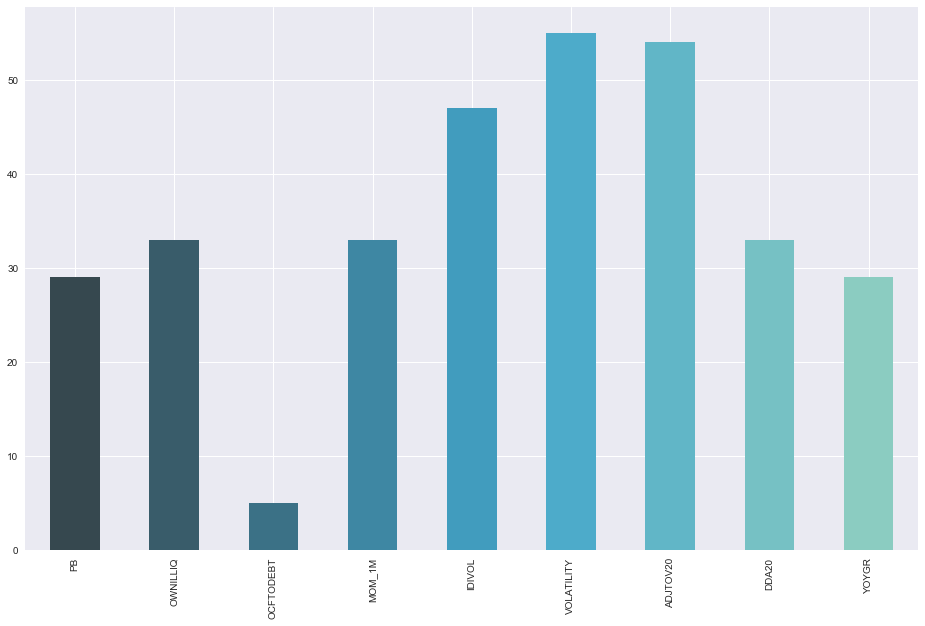

In [174]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",10))

In [175]:
ICFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-0.037155,0.033631,0.011271,-0.071645,-0.100966,-0.060069,-0.116954,-0.047353,-0.003494
std,0.089481,0.098232,0.061659,0.096335,0.088043,0.127836,0.083880,0.094082,0.099490
min,-0.242434,-0.195543,-0.382625,-0.322864,-0.319215,-0.293192,-0.334465,-0.271052,-0.262474
25%,-0.106688,-0.025333,-0.013332,-0.117177,-0.145675,-0.155751,-0.171006,-0.110078,-0.053491
50%,-0.030434,0.031376,0.009964,-0.067192,-0.098899,-0.083080,-0.113837,-0.057397,-0.001193
75%,0.030926,0.087366,0.039765,-0.008079,-0.058398,0.033883,-0.059285,0.020575,0.059023
max,0.166625,0.264669,0.203213,0.111227,0.079835,0.204790,0.081339,0.207672,0.231941


In [176]:
# Factors with positive IC
Above0df = ICFactor.astype(float)[ICFactor.astype(float)>0].describe()
Above0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,32.000000,58.000000,51.000000,19.000000,11.000000,28.000000,6.000000,28.000000,42.000000
mean,0.050753,0.084559,0.040637,0.048564,0.042617,0.090413,0.037266,0.058127,0.073942
std,0.040736,0.065727,0.037695,0.035815,0.019562,0.060273,0.027754,0.046814,0.061215
min,0.004094,0.001588,0.000492,0.005990,0.021240,0.014750,0.007182,0.003000,0.000451
25%,0.027746,0.031114,0.019080,0.016533,0.029053,0.034003,0.015339,0.029633,0.021996
50%,0.036455,0.072599,0.031226,0.043035,0.037890,0.085058,0.038456,0.043993,0.059051
75%,0.069885,0.128629,0.052678,0.078269,0.049748,0.136901,0.047509,0.084563,0.126173
max,0.166625,0.264669,0.203213,0.111227,0.079835,0.204790,0.081339,0.207672,0.231941


In [177]:
# Factors with negative IC
Below0df = ICFactor.astype(float)[ICFactor.astype(float)<0].describe()
Below0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,53.000000,27.000000,34.000000,66.000000,74.000000,57.000000,79.000000,57.000000,43.000000
mean,-0.090231,-0.075770,-0.032777,-0.106251,-0.122309,-0.133989,-0.128667,-0.099168,-0.079129
std,0.065711,0.059073,0.064753,0.078728,0.072794,0.076665,0.074561,0.062648,0.065461
min,-0.242434,-0.195543,-0.382625,-0.322864,-0.319215,-0.293192,-0.334465,-0.271052,-0.262474
25%,-0.133976,-0.127509,-0.028951,-0.140804,-0.154218,-0.186942,-0.175359,-0.140920,-0.106114
50%,-0.075915,-0.056462,-0.019626,-0.082699,-0.104777,-0.131497,-0.117016,-0.088177,-0.053491
75%,-0.035571,-0.029896,-0.007134,-0.050741,-0.078526,-0.083080,-0.070649,-0.057397,-0.031829
max,-0.001058,-0.002581,-0.001011,-0.003513,-0.001195,-0.008112,-0.012337,-0.002794,-0.001193


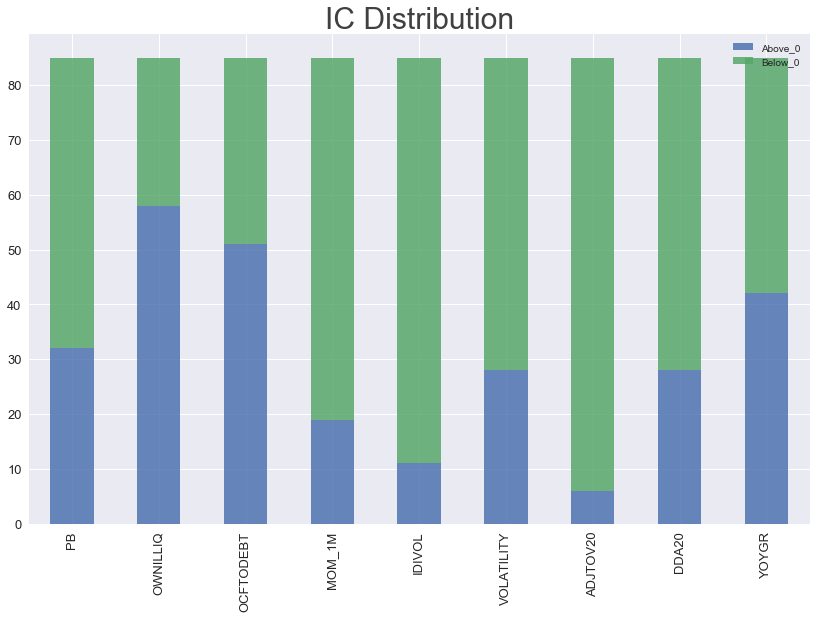

In [178]:
# show the amount of Negative IC and Positive IC in same figure
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)
totaldf = pd.DataFrame({ 'Above_0':Above0df.loc['count'].values, 'Below_0':Below0df.loc['count'].values},index = Above0df.columns)
totaldf.plot(kind='bar',ax=ax, stacked =True,alpha=0.84,title ='IC Distribution',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.88, fontsize=30)

In [179]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000151,-0.003748,-0.002289,0.002832,-0.000015,-0.002179,-0.000348
2016-10-31,0.000875,0.003073,-0.000194,-0.005342,-0.011039,-0.015201,-0.010632,-0.007422,-0.001089
2016-11-30,0.001875,0.001984,0.001373,0.005827,0.004441,-0.006739,-0.001130,-0.009102,-0.001556
2016-12-30,-0.003147,-0.000577,-0.000148,-0.009677,-0.012393,-0.013764,-0.014612,-0.010511,-0.002464
2017-01-26,-0.001113,-0.008740,0.003354,-0.004957,-0.005537,-0.003256,-0.002845,-0.002314,-0.000427


In [180]:
ICFactor.iloc[-1] > ICFactor.mean()

PB            False
OWNILLIQ      False
OCFTODEBT      True
MOM_1M         True
IDIVOL        False
VOLATILITY    False
ADJTOV20       True
DDA20          True
YOYGR         False
dtype: bool

In [181]:
ICFactorTosave = ICFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)
#ICFactorTosave.to_csv((path+'ICfactorWeight8factorsPB.csv'))

In [182]:
ReturnTosave = returnofFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)

In [183]:
ReturnTosave.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.044825,0.110275,0.044593,0.056782,-0.093985,-0.298431,-0.179137,-0.155280,-0.016691
2016-10-31,0.111817,0.141562,-0.009747,-0.242016,-0.147834,0.182887,-0.000968,-0.140703,-0.022466
2016-11-30,0.015948,0.056007,-0.003529,-0.097366,-0.201199,-0.277054,-0.193774,-0.135278,-0.019845
2016-12-30,0.055110,0.058309,0.040336,0.171256,0.130527,-0.198041,-0.033196,-0.267485,-0.045741
2017-01-26,-0.046773,-0.008567,-0.002200,-0.143809,-0.184167,-0.204541,-0.217137,-0.156193,-0.036613


In [184]:
# calculate correlation between two factors
turnOver = pd.read_csv(path+filenameADJTOV20,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
illq = pd.read_csv(path+filenameOwnVol ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(turnOver,illq, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,86.000000,86.000000
mean,0.350672,0.380670
std,0.130670,0.081165
min,0.074028,0.209563
25%,0.226748,0.333923
50%,0.373195,0.388377
75%,0.460104,0.438110
max,0.604413,0.575350


In [185]:
returnofFactor.cumsum().tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,-0.108861,0.255537,0.014886,-0.554041,-0.646073,-0.335929,-0.907035,-0.515212,0.024838
2016-10-31,-0.107986,0.258610,0.014692,-0.559383,-0.657112,-0.351131,-0.917667,-0.522634,0.023749
2016-11-30,-0.106110,0.260594,0.016065,-0.553556,-0.652671,-0.357869,-0.918797,-0.531736,0.022193
2016-12-30,-0.109258,0.260017,0.015916,-0.563233,-0.665064,-0.371633,-0.933409,-0.542247,0.019729
2017-01-26,-0.110371,0.251277,0.019271,-0.568190,-0.670601,-0.374889,-0.936254,-0.544561,0.019302


In [186]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000151,-0.003748,-0.002289,0.002832,-0.000015,-0.002179,-0.000348
2016-10-31,0.000875,0.003073,-0.000194,-0.005342,-0.011039,-0.015201,-0.010632,-0.007422,-0.001089
2016-11-30,0.001875,0.001984,0.001373,0.005827,0.004441,-0.006739,-0.001130,-0.009102,-0.001556
2016-12-30,-0.003147,-0.000577,-0.000148,-0.009677,-0.012393,-0.013764,-0.014612,-0.010511,-0.002464
2017-01-26,-0.001113,-0.008740,0.003354,-0.004957,-0.005537,-0.003256,-0.002845,-0.002314,-0.000427


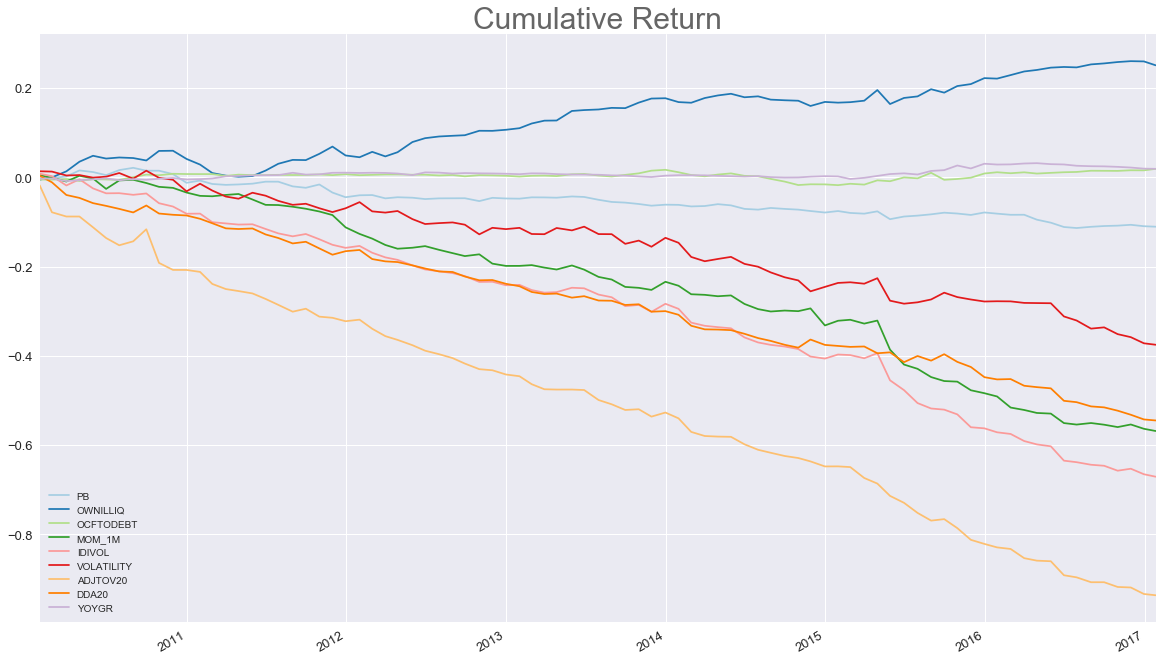

In [187]:
# simple cumulative return 
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
returnofFactor.cumsum().plot(figsize=(20,12),ax=ax,color=sns.color_palette("Paired",10),title ='Cumulative Return',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

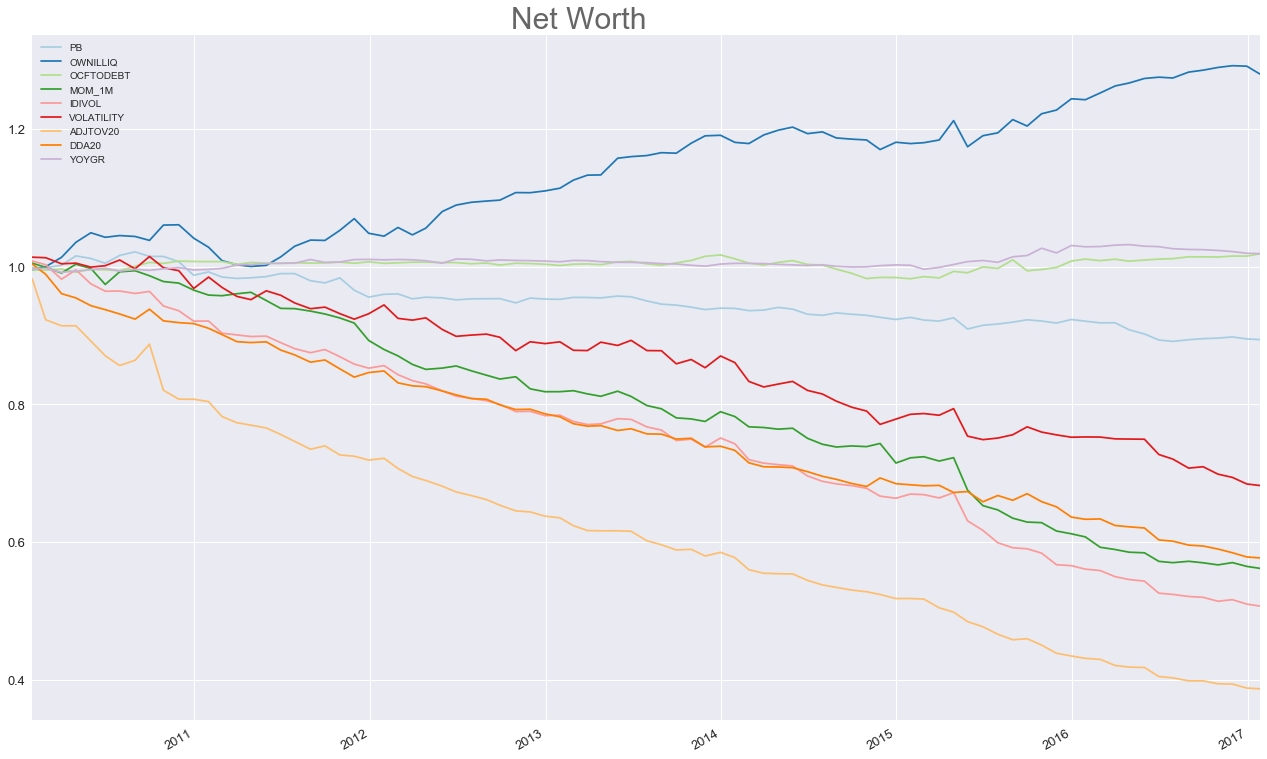

In [188]:
# Net worth plot for each factor
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(returnofFactor+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [189]:
returnofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-0.001298,0.002956,0.000227,-0.006685,-0.007889,-0.004410,-0.011015,-0.006407,0.000227
std,0.005676,0.009891,0.003947,0.011855,0.011178,0.012387,0.013215,0.008713,0.002951
min,-0.019559,-0.031312,-0.015684,-0.065243,-0.060835,-0.050351,-0.075389,-0.028443,-0.006592
25%,-0.003371,-0.001252,-0.001755,-0.009677,-0.012329,-0.011571,-0.016488,-0.010511,-0.001341
50%,-0.001113,0.002381,-0.000041,-0.005840,-0.006643,-0.004510,-0.009548,-0.007026,-0.000263
75%,0.002269,0.009069,0.002056,-0.000414,-0.002568,0.002849,-0.002845,-0.001464,0.001602
max,0.013495,0.023788,0.012408,0.018903,0.018043,0.019989,0.027029,0.018168,0.010577


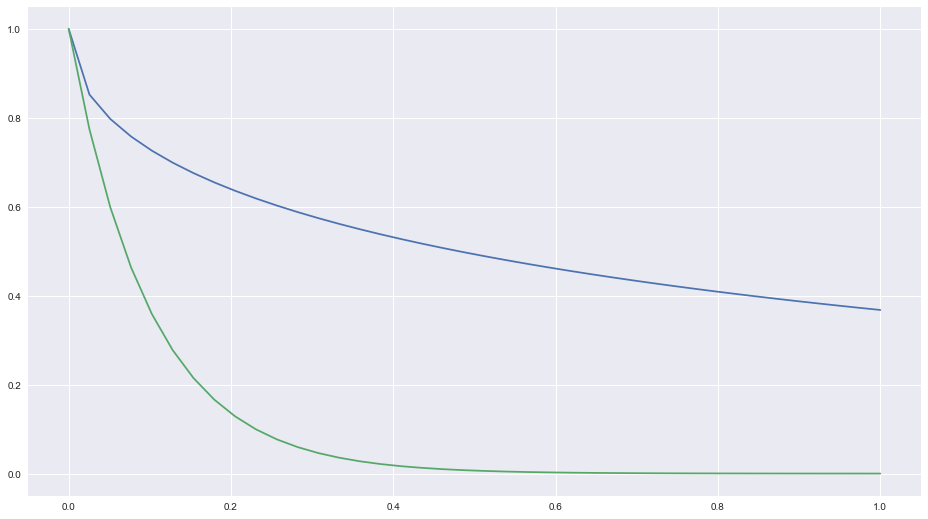

In [190]:
# show how ln function decays 
fig = plt.figure(figsize=(16,9))
x = np.linspace(0,1,40)
y = np.exp(-np.sqrt(x))
y1 = np.exp(-10*x)
plt.plot(x,y)
plt.plot(x,y1)

In [191]:
#
pWeight = np.exp(-7*pValueofFactor.astype(float)).shift(1)

In [192]:
pWeight.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.454609,0.996994,0.402635,0.691338,0.991848,1.000000,1.000000,0.999987,0.020809
2016-10-31,0.223945,0.352635,0.001631,0.947154,0.459849,0.622303,0.000966,0.356809,0.003702
2016-11-30,0.015749,0.509857,0.001710,0.991000,1.000000,1.000000,1.000000,0.999554,0.029844
2016-12-30,0.091659,0.067189,0.028998,0.972329,0.809288,0.989240,0.014296,0.999220,0.050351
2017-01-26,0.610994,0.004513,0.001438,0.999999,1.000000,1.000000,1.000000,0.999999,0.346193


In [193]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000151,-0.003748,-0.002289,0.002832,-0.000015,-0.002179,-0.000348
2016-10-31,0.000875,0.003073,-0.000194,-0.005342,-0.011039,-0.015201,-0.010632,-0.007422,-0.001089
2016-11-30,0.001875,0.001984,0.001373,0.005827,0.004441,-0.006739,-0.001130,-0.009102,-0.001556
2016-12-30,-0.003147,-0.000577,-0.000148,-0.009677,-0.012393,-0.013764,-0.014612,-0.010511,-0.002464
2017-01-26,-0.001113,-0.008740,0.003354,-0.004957,-0.005537,-0.003256,-0.002845,-0.002314,-0.000427


In [194]:
ICweighted = ICFactorTosave * pWeight
#ICweighted.to_csv((path+'IC_Weighted_By_P_Value.csv'))
ICweighted.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,-0.042252,0.069403,0.009818,0.037284,-0.091083,-0.200721,-0.190782,-0.100085,-0.003656
2016-10-31,-0.012138,0.036524,-0.000037,-0.208230,-0.091504,-0.028021,-0.000149,-0.018177,-0.000554
2016-11-30,-0.000719,-0.019728,0.000027,-0.062854,-0.225885,-0.271379,-0.149366,-0.155089,-0.001043
2016-12-30,-0.006662,0.000215,-0.002222,0.080473,-0.002675,-0.255316,-0.002786,-0.082854,-0.011357
2017-01-26,0.083448,0.000182,0.000064,-0.068774,-0.135010,-0.151782,-0.067548,-0.204361,0.052336


In [195]:
totalWeighted = (ReturnTosave * pWeight + ICFactorTosave)
#totalWeighted .to_csv((path+'total_Weighted_By_P_Value.csv'))

In [196]:
pValueofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,8.500000e+01,8.500000e+01,85.000000,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,85.000000
mean,2.873016e-01,2.050358e-01,0.443238,1.104782e-01,1.028759e-01,1.276065e-01,1.336691e-01,1.555328e-01,0.488640
std,3.055197e-01,2.887792e-01,0.318294,2.140973e-01,2.216447e-01,2.573895e-01,2.805339e-01,2.613366e-01,0.290924
min,3.870119e-16,3.351571e-19,0.001461,1.422291e-45,1.866055e-48,4.192592e-37,1.617560e-45,7.469855e-32,0.000921
25%,9.689586e-03,1.778175e-05,0.146532,8.550406e-08,1.556023e-08,1.703880e-09,3.380289e-10,6.366138e-05,0.278641
50%,1.792277e-01,9.706165e-03,0.417030,4.535130e-03,3.061039e-04,9.971990e-04,1.295755e-04,3.370986e-03,0.488355
75%,4.585359e-01,3.992608e-01,0.697518,5.273236e-02,4.907261e-02,9.720072e-02,5.131599e-02,1.577702e-01,0.739507
max,9.950327e-01,9.321502e-01,0.991540,9.609281e-01,9.233176e-01,9.395284e-01,9.965225e-01,8.782136e-01,0.973402


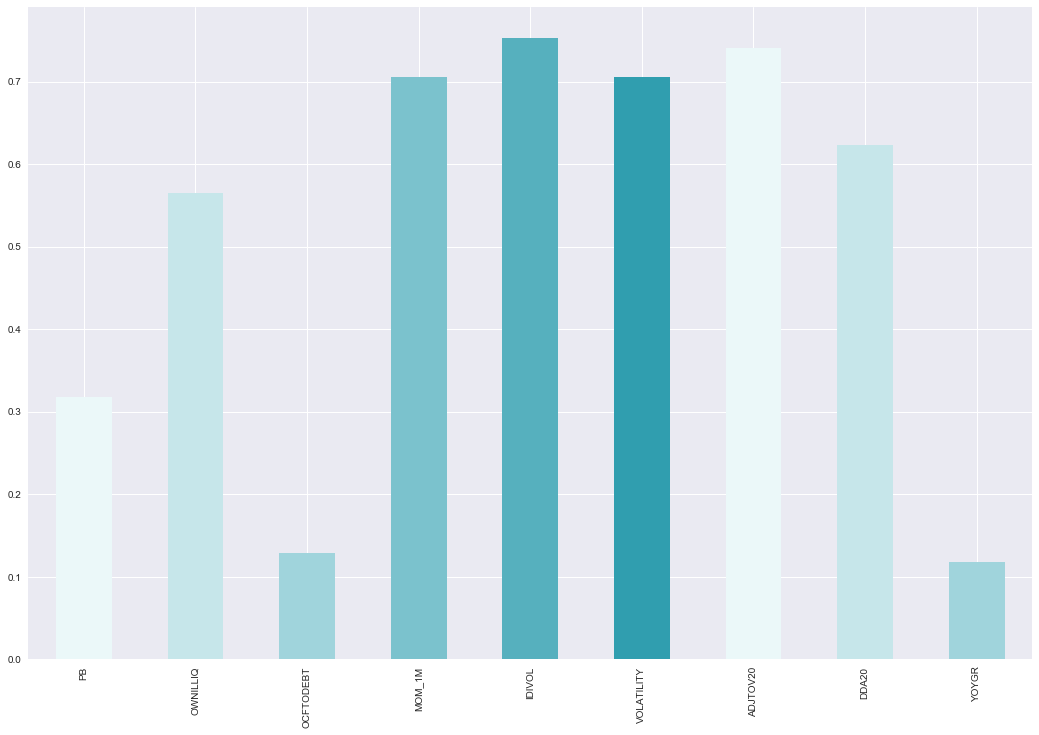

In [197]:
color_set=sns.light_palette((210, 90, 60), input="husl")
(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

In [198]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1)

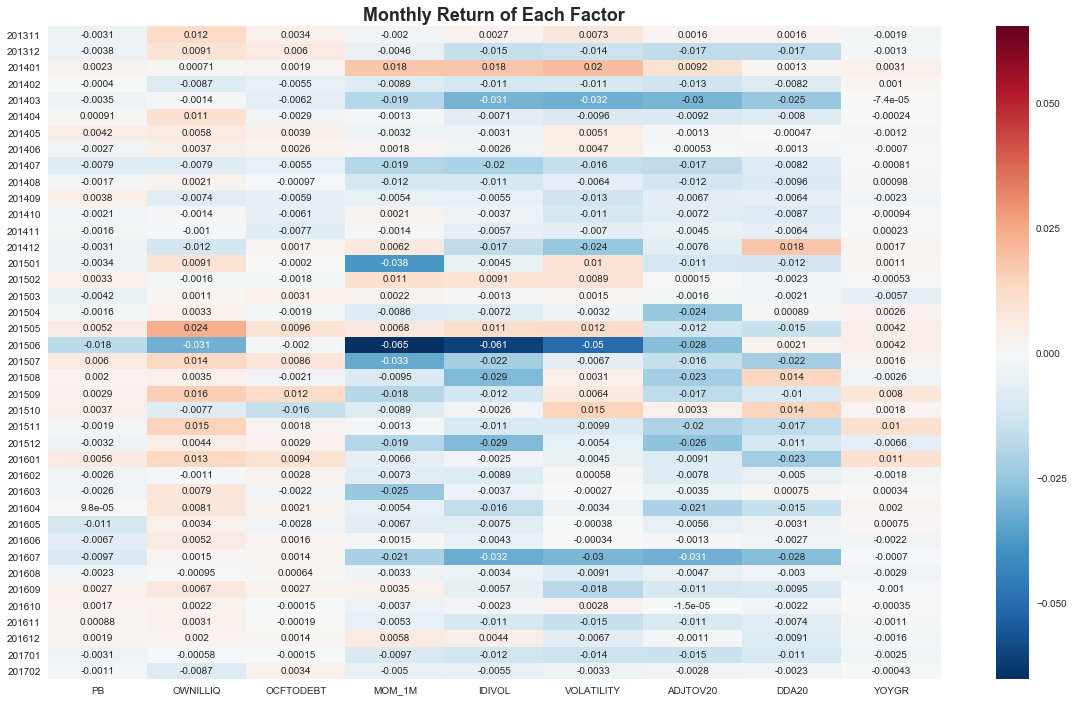

In [199]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(20,12))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of Each Factor',fontsize=18, fontweight='bold')
plt.show()